In [1]:
# IMporting necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Insurance Claim Prediction**

Predict whether the policyholder will file a claim in the next 6 months or not.



**Problem Statement**

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the **highest claim settlement ratio**. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, **instant policy issuance**, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to **optimize the cost of the insurance** by identifying the policyholders who are more likely to claim in the next 6 months. 

**Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months.** The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.



In [2]:
data_train = pd.read_csv(r"D:\Case Study\train_qWM28Yl.csv")
data_test = pd.read_csv(r"D:\Case Study\test_zo1G9sv.csv")
submission = pd.read_csv(r"D:\Case Study\sample_submission_KvRh9Sx.csv")

In [71]:
pd.set_option("display.max_columns",100)
data_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
# let's combine the data

combined = pd.concat([data_train,data_test],ignore_index=True)

In [5]:
combined.shape

(97655, 44)

In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [7]:
# Univetate analysis

In [8]:
num_cols = combined.select_dtypes(include=np.number).columns
num_cols

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [9]:
cat_cols = combined.select_dtypes(include="object").columns
cat_cols

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [10]:
len(num_cols), len(cat_cols)

(16, 28)

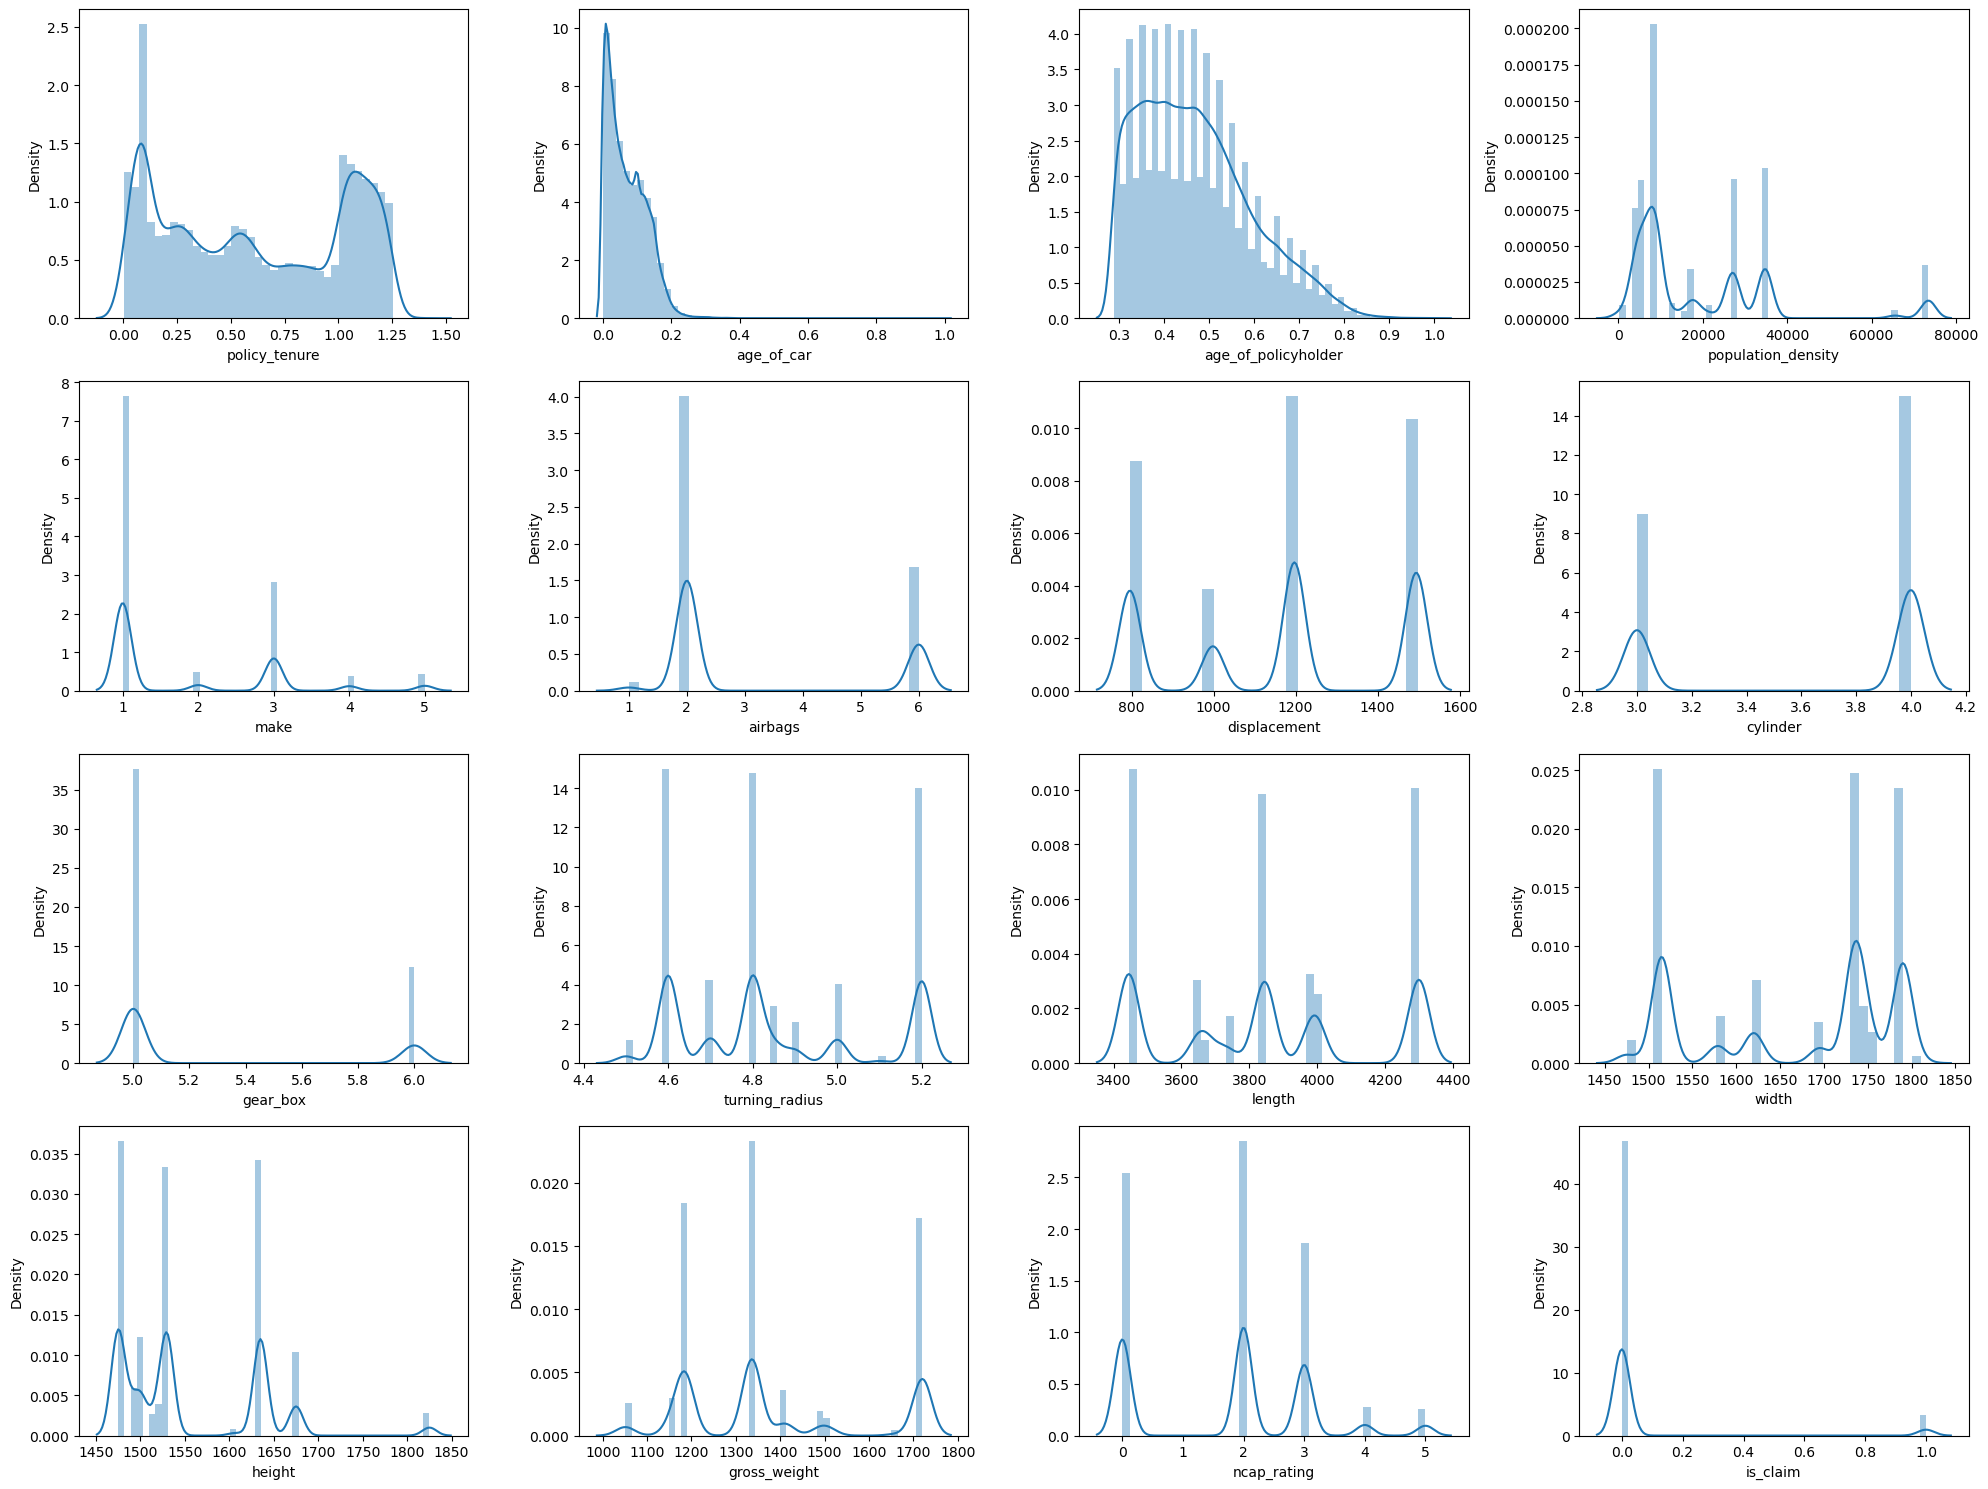

In [11]:
it = 1

plt.figure(figsize=(20,15))
for i in num_cols:
    plt.subplot(4,4,it)
    sns.distplot(combined.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

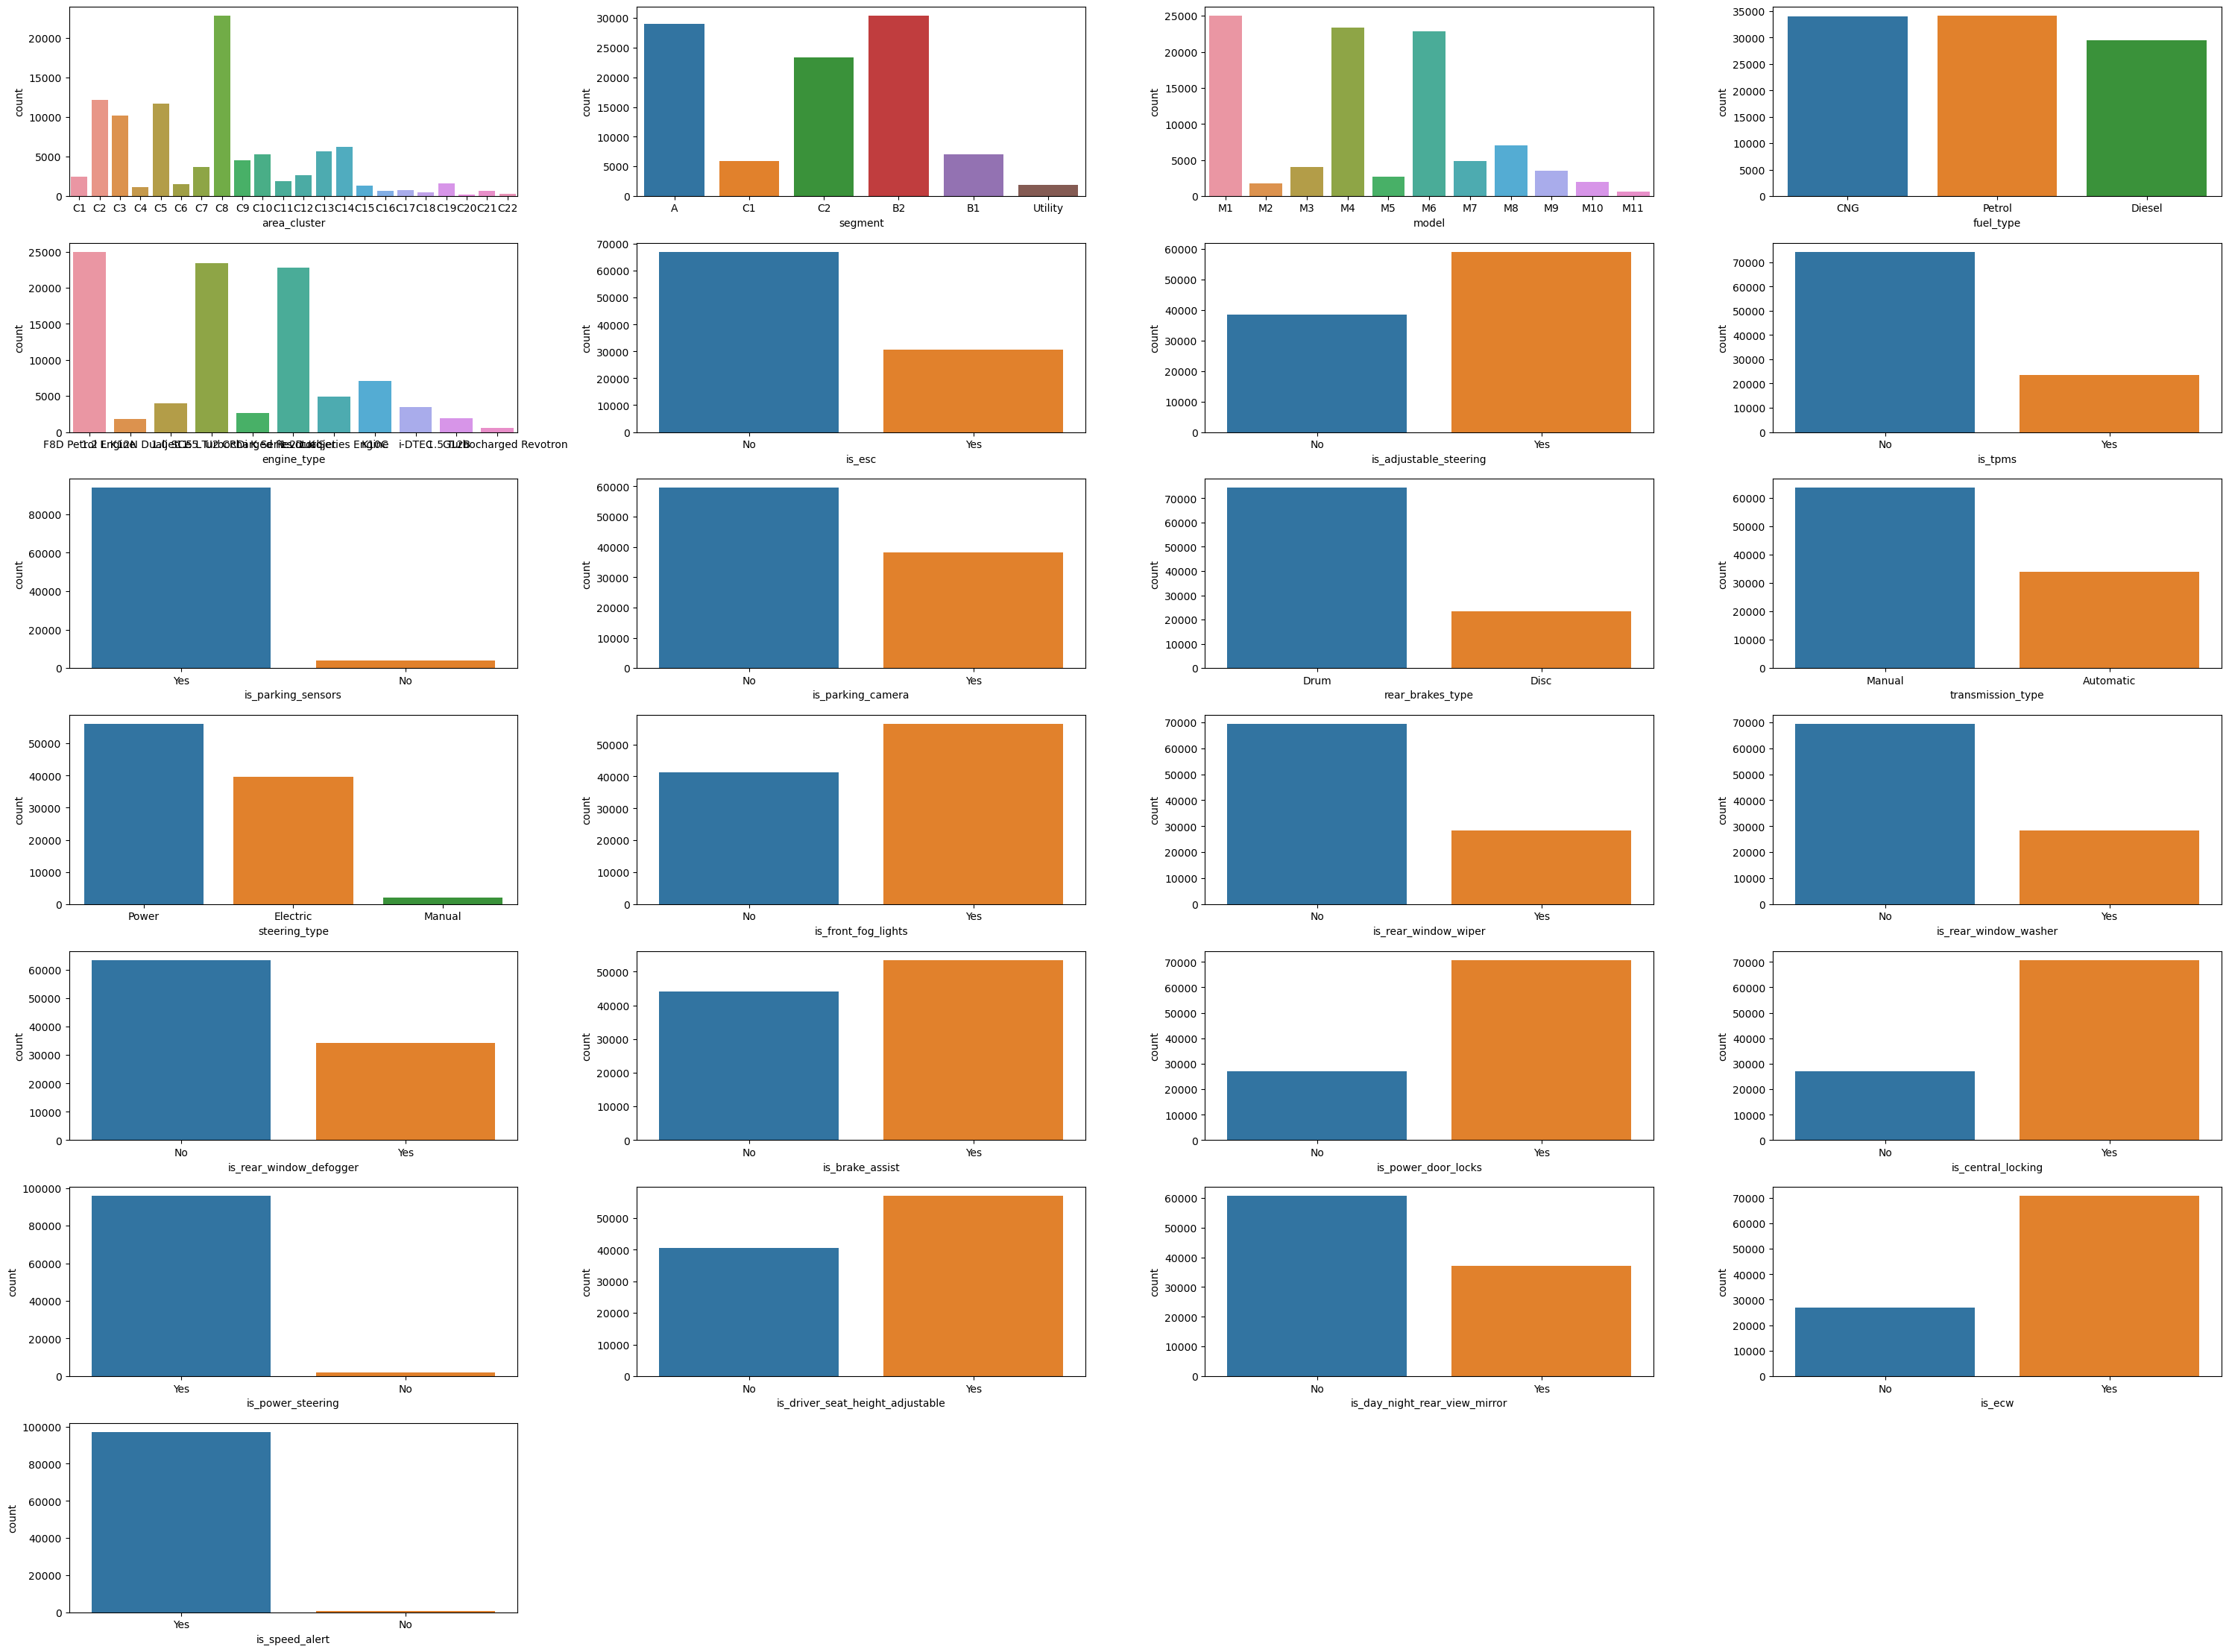

In [12]:
cat = ['area_cluster', 'segment', 'model', 'fuel_type',
       'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

it = 1

plt.figure(figsize=(30,25))
for i in cat:
    plt.subplot(8,4,it)
    sns.countplot(combined.loc[:,i])
    #plt.xlabel()
    it+=1
plt.tight_layout()
plt.show()

In [13]:
# Bivaraite Analysis

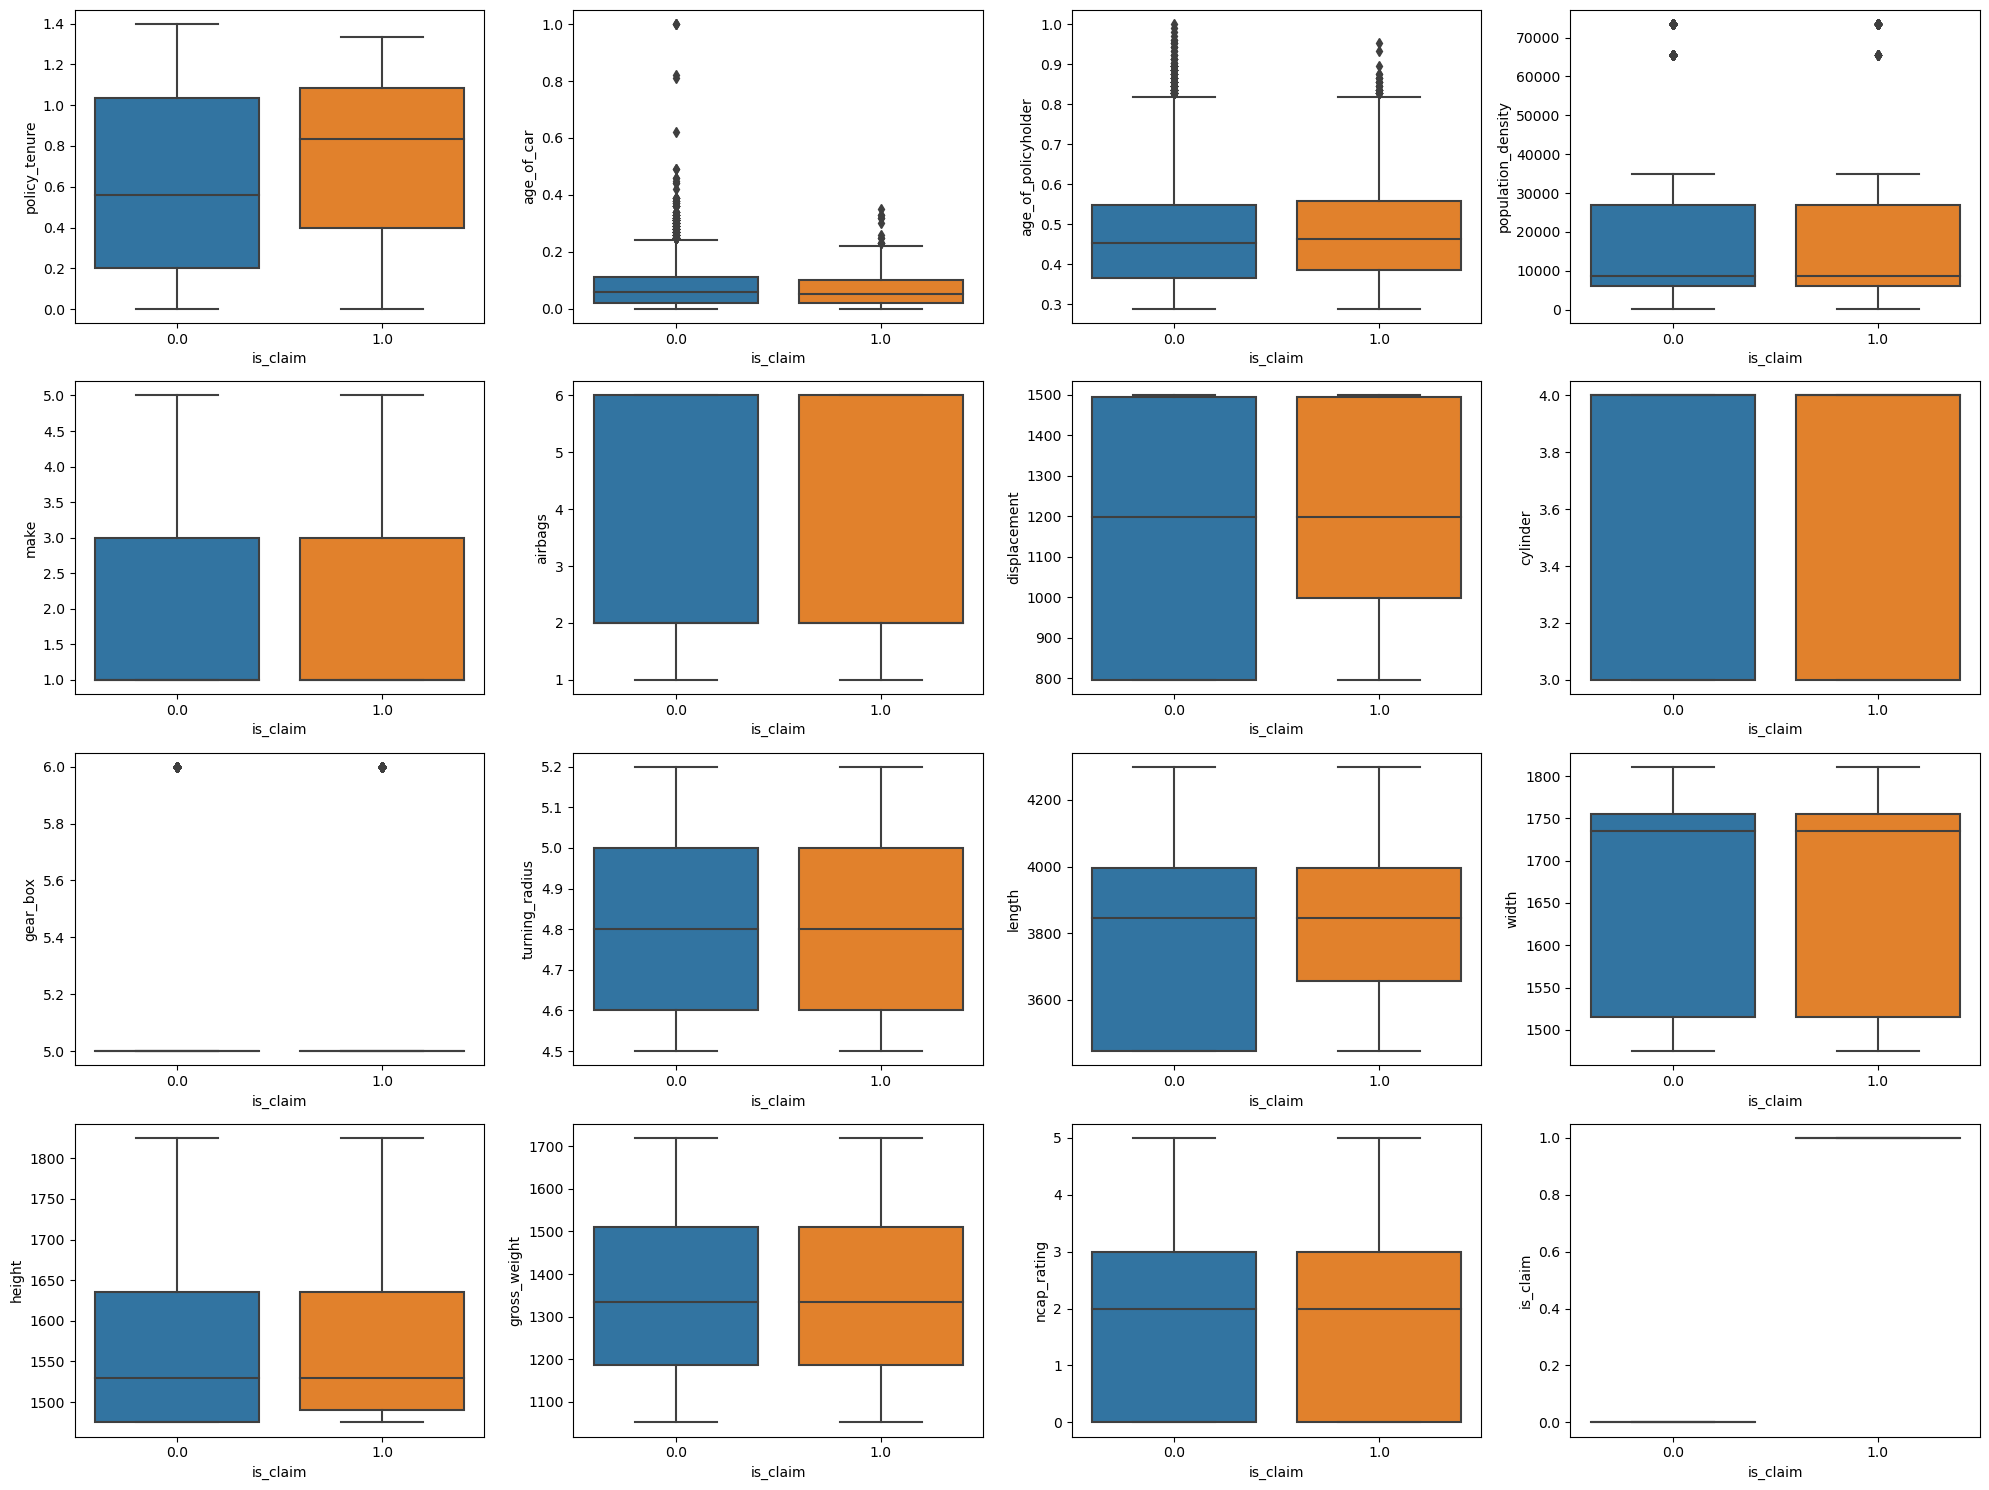

In [14]:
it = 1

plt.figure(figsize=(20,15))
for i in num_cols:
    plt.subplot(4,4,it)
    sns.boxplot(combined.is_claim,combined.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

In [15]:
# Apply the statistical test

# Two sample Independent T test

# Ho : That the feature has no effect on the target or vice versa
# Ha : That the feature has effect on the target or vice versa

imp_feat = []

import scipy.stats as stats

for i in num_cols:
    zero = combined.loc[combined.is_claim==0,i]
    one = combined.loc[combined.is_claim==1,i]
    teststatics,pvalue = stats.ttest_ind(zero,one,alternative="two-sided")
    
    if pvalue<0.05:
        imp_feat.append(i)

print(imp_feat)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width', 'is_claim']


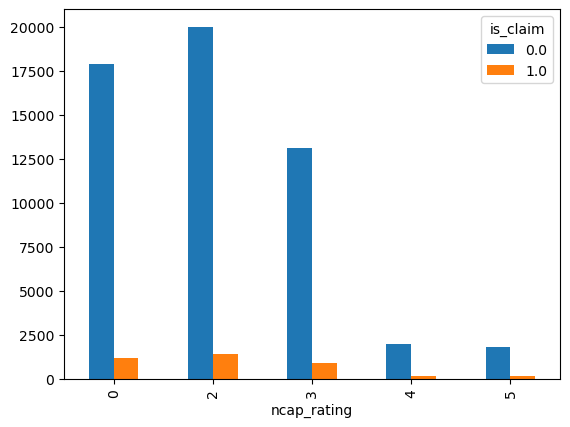

In [16]:
# NCAP rating vs Target

pd.crosstab(combined.ncap_rating,combined.is_claim).plot(kind="bar")
plt.show()

# Inference = we can say that the cars that have the lowest ncap rating more prone to the claim....

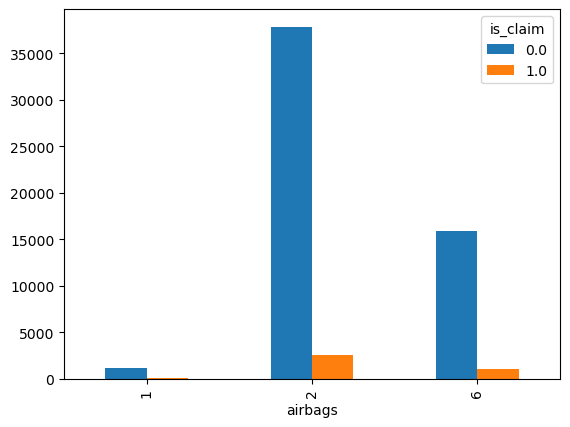

In [17]:
# Airbag vs Target

pd.crosstab(combined.airbags,combined.is_claim).plot(kind="bar")
plt.show()



In [18]:
# Cat vs Target ststistical test


cat_feat = []
for i in cat:
    tbl = pd.crosstab(combined.loc[:,i],combined.is_claim)
    teststats,pvalue,dof,exp_freq = stats.chi2_contingency(tbl)
    
    if pvalue<0.05:
        cat_feat.append(i)

print(cat_feat)

['area_cluster', 'segment', 'model', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']


# Feature Engineering

In [19]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [20]:
combined[["Nm_torque","rpm_torque"]] = combined.max_torque.str.split("@",expand=True)

In [21]:
combined[["hp","rpm_power"]] = combined.max_power.str.split("@",expand=True)

In [22]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm


In [23]:
# Removing the rpm/Nm/ string

combined["rpm_torque"] = combined.rpm_torque.apply(lambda x:float(x[:-3]))
combined["Nm_torque"] = combined.Nm_torque.apply(lambda x:float(x[:-2]))
combined["hp"] = combined.hp.apply(lambda x:float(x[:-3]))
combined["rpm_power"] = combined.rpm_power.apply(lambda x:float(x[:-3]))


# combined

In [24]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0


In [25]:
for i in cat_cols:
   if i.startswith("is") & (i!="is_claim"):
        mapp = {"Yes":1,"No":0}
        combined[i] = combined[i].map(mapp)
    

In [26]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0


In [28]:
combined.isnull().sum()[combined.isnull().sum()!=0]

is_claim    39063
dtype: int64

In [29]:
# per unit torque

combined["Per_unit_torque"] = combined.rpm_torque/combined.Nm_torque

In [30]:
# per unit power

combined["Per_unit_power"] = combined.rpm_power/combined.hp

In [34]:
combined["Age_prop"] = combined.age_of_car/combined.age_of_policyholder

In [37]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,Per_unit_torque,Per_unit_power,Age_prop
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333


In [54]:
# count of policy id as per the area cluster 

combined["magic1"] = combined.groupby("area_cluster")["policy_id"].transform("nunique")

In [55]:
zero = combined.loc[combined.is_claim==0,"magic1"]
one = combined.loc[combined.is_claim==1,"magic1"]

stats.ttest_ind(zero,one)

Ttest_indResult(statistic=-4.251501393229285, pvalue=2.1267052931968336e-05)

In [65]:
# count of policies in Magic1/pop Density

combined["magic2"] = combined.magic1/combined.population_density

In [67]:
zero = combined.loc[combined.is_claim==0,"magic2"]
one = combined.loc[combined.is_claim==1,"magic2"]

stats.ttest_ind(zero,one)

Ttest_indResult(statistic=-3.7411060267064706, pvalue=0.00018338678692374335)

In [59]:
# combined.groupby("policy_id")["policy_tenure"].transform("min")

In [63]:
combined["magic3"] = combined.groupby("area_cluster")["policy_tenure"].transform("min")
combined["magic4"] = combined.groupby("area_cluster")["policy_tenure"].transform("max")
combined["magic5"] = combined.groupby("area_cluster")["policy_tenure"].transform("mean")
combined["magic6"] = combined.groupby("area_cluster")["policy_tenure"].transform("median")

In [66]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,Per_unit_torque,Per_unit_power,Age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [69]:
list_feat= ["magic3","magic4","magic5","magic6"]

for i in list_feat:
    zero = combined.loc[combined.is_claim==0,i]
    one = combined.loc[combined.is_claim==1,i]
    teststats,pvalue=stats.ttest_ind(zero,one)
    
    print("Pvalue: ",i,pvalue)


Pvalue:  magic3 0.01517380140799255
Pvalue:  magic4 0.1896759377985605
Pvalue:  magic5 2.5550496912611606e-07
Pvalue:  magic6 2.4634736641066477e-07


In [72]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,Per_unit_torque,Per_unit_power,Age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,1.262558,0.493563,0.436682
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,1.247390,0.509921,0.457736
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,1.396641,0.520588,0.487713


In [74]:
# Area,segment, model, fuel_type, 

combined.engine_type.unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [78]:
# Stastical test for engine type

tbl = pd.crosstab(combined.is_claim,combined.engine_type)
teststats,pvalue,dof,exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.029490222196639326


In [77]:
# combined.transmission_type.unique()

In [75]:
combined["transmission_type"] = np.where(combined.transmission_type=="Manual",1,0)

In [81]:
# Dealing with the rear_disk_brakes

combined.rear_brakes_type.unique()

array(['Drum', 'Disc'], dtype=object)

In [82]:
combined["rear_brakes_type"] = np.where(combined.rear_brakes_type=="rear_brakes_type",1,0)

In [84]:
!pip install category_encoders

     -------------------------------------- 81.2/81.2 kB 754.7 kB/s eta 0:00:00


In [86]:
# Dealing with the Steering_types

mycol = ["area_cluster","steering_type","engine_type","model","fuel_type","segment"]

import category_encoders as ce

tgt = ce.TargetEncoder(cols=mycol)

In [88]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,Per_unit_torque,Per_unit_power,Age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,0,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,0,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,0,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,1.262558,0.493563,0.436682
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,0,1197,4,0,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,1.247390,0.509921,0.457736
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,0,999,3,0,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,1.396641,0.520588,0.487713


In [92]:
#combined.drop(columns=["policy_id","max_torque","max_power"],axis=1,inplace=True)
combined.drop(columns=["magic4"],axis=1,inplace=True)

In [94]:
# split the data into train and test

newtrain = combined.loc[0:data_train.shape[0]-1,]
newtest = combined.loc[data_train.shape[0]:,]

In [97]:
X = newtrain.drop("is_claim",axis=1)
y = newtrain.is_claim

In [98]:
newtest = newtest.drop("is_claim",axis=1)

In [102]:
mycol = ["area_cluster","steering_type","engine_type","model","fuel_type","segment"]

import category_encoders as ce

tgt = ce.TargetEncoder(cols=mycol)
newx = tgt.fit_transform(X,y)
test_encoded = tgt.transform(newtest)

In [103]:
newx

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_torque,hp,rpm_power,Per_unit_torque,Per_unit_power,Age_prop,magic1,magic2,magic3,magic5,magic6
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,0.471300,0.396802
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,0.609815,0.572343
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,0.493563,0.436682
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,0,1197,4,0,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,0.509921,0.457736
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0,999,3,0,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,0.520588,0.487713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,0.069870,8794,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0,999,3,0,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.201791,22815,2.594383,0.002740,0.745384,0.898663
58588,1.199642,0.02,0.519231,0.076776,7788,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.038519,6215,0.798023,0.002735,0.766214,0.961876
58589,1.162273,0.05,0.451923,0.057745,34738,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.110638,11683,0.336318,0.002768,0.520588,0.487713
58590,1.236307,0.14,0.557692,0.069870,8794,1,0.068581,0.068162,0.066384,0.068162,2,0,1,0,1,0,0,1197,4,1,5,0.066873,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.251034,22815,2.594383,0.002740,0.745384,0.898663


In [104]:
# Lets create unit weight

newx["per_unit_vol"] = newx.gross_weight/(newx.gross_weight*newx.width*newx.height)
test_encoded["per_unit_vol"] = test_encoded.gross_weight/(test_encoded.gross_weight*test_encoded.width*test_encoded.height)


In [105]:
newx

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_torque,hp,rpm_power,Per_unit_torque,Per_unit_power,Age_prop,magic1,magic2,magic3,magic5,magic6,per_unit_vol
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,0.471300,0.396802,4.475024e-07
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,0.609815,0.572343,4.475024e-07
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,0.493563,0.436682,4.475024e-07
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,0,1197,4,0,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,0.509921,0.457736,3.804415e-07
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0,999,3,0,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,0.520588,0.487713,4.250418e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,0.069870,8794,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0,999,3,0,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.201791,22815,2.594383,0.002740,0.745384,0.898663,4.250418e-07
58588,1.199642,0.02,0.519231,0.076776,7788,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.038519,6215,0.798023,0.002735,0.766214,0.961876,4.475024e-07
58589,1.162273,0.05,0.451923,0.057745,34738,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.110638,11683,0.336318,0.002768,0.520588,0.487713,4.475024e-07
58590,1.236307,0.14,0.557692,0.069870,8794,1,0.068581,0.068162,0.066384,0.068162,2,0,1,0,1,0,0,1197,4,1,5,0.066873,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.251034,22815,2.594383,0.002740,0.745384,0.898663,3.767117e-07


In [108]:
# Lets apply the scaling to the data

scal = ["population_density","displacement","policy_tenure","length","width","height","gross_weight","Nm_torque","rpm_torque","hp","rpm_power","Per_unit_torque","Per_unit_power","magic1","magic3","magic5","magic6"]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

for i in scal:
    newx.loc[:,i] = sc.fit_transform(pd.DataFrame(newx.loc[:,i]))
    test_encoded.loc[:,i] = sc.transform(pd.DataFrame(test_encoded.loc[:,i]))

# Lets apply the model

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf = RandomForestClassifier(criterion="entropy")

pred = rf.fit(newx,y).predict(test_encoded)

In [113]:
submission["is_claim"] = pred

In [116]:
submission.to_csv("Merapehlamodel.csv",index=False)

In [117]:
cd

C:\Users\vsdel


In [ ]:
pred.f

# Apply SMOTE

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
smote = SMOTE()

In [120]:
# Resamble the Data using Smote

smotex, smotey = smote.fit_resample(newx,y)

In [121]:
rf = RandomForestClassifier(criterion="entropy")
pred_smote = rf.fit(smotex,smotey).predict(test_encoded)

In [123]:
submission["is_claim"]= pred_smote

In [126]:
submission.to_csv("Merapehlamodel1.csv",index=False)

In [127]:
cd

C:\Users\vsdel


# Define the Base Model

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

In [137]:
!pip install Lightgbm

In [131]:
! pip install catboost

In [150]:
def base_models():
    models = dict()
    models["lg"]= LogisticRegression()
    models["rf"]= RandomForestClassifier()
    models["ada"]= AdaBoostClassifier()
    models["gbm"]= GradientBoostingClassifier()
    models["xgb"]= XGBClassifier()
    models["lgbm"]= LGBMClassifier()
    models["catboost"]= CatBoostClassifier()
    models["naive_bayes"]= GaussianNB()
    return models

In [151]:
# Evaluation Function

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,StratifiedKFold


In [152]:

def eval_score(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(model,smotex,smotey,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return score

In [160]:
# Build the models

model = base_models()

result, names = list(), list()
for name,model in model.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print("%s %.3f (%.3f)"% (name, np.mean(result), np.std(result)))

lg 0.587 (0.001)
rf 0.747 (0.160)
ada 0.735 (0.132)
gbm 0.773 (0.132)
xgb 0.811 (0.140)
lgbm 0.834 (0.138)
catboost 0.852 (0.135)
naive_bayes 0.820 (0.152)


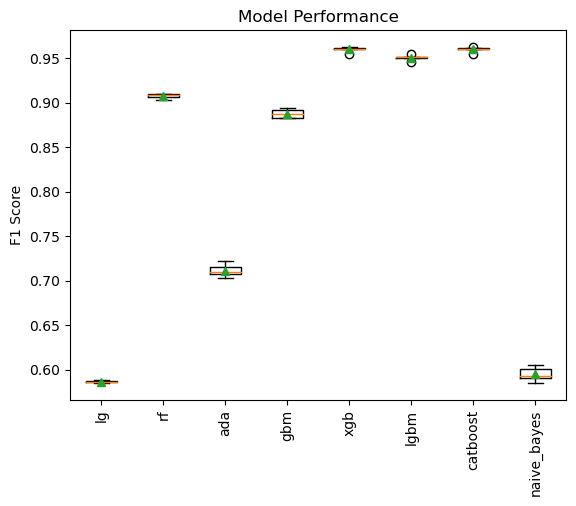

In [162]:
plt.boxplot(result, labels=names, showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

In [163]:
# Finalmodels - XGB, LGBM, CATBOOST

base=['xgb','lgbm']
final=['catboost']
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

from sklearn.ensemble import StackingClassifier
stack=StackingClassifier(estimators=base,final_estimator=CatBoostClassifier(),cv=cv)

In [164]:
pred_stack = stack.fit(smotex, smotey).predict(test_encoded)

ValueError: too many values to unpack (expected 2)